In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Step 1: Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step 2: Preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Step 3: Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
model.fit(x_train, y_train, epochs=2, batch_size=64, validation_data=(x_test, y_test))

# Step 6: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)


Epoch 1/2
782/782 [==============================] - 72s 89ms/step - loss: 1.6342 - accuracy: 0.4021 - val_loss: 1.3592 - val_accuracy: 0.5026
Epoch 2/2
313/313 [==============================] - 4s 13ms/step - loss: 1.2212 - accuracy: 0.5609
Test accuracy: 0.5608999729156494


1/1 [==============================] - 0s 21ms/step


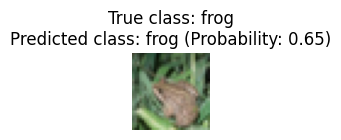

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Choose an example image from the test set
example_index = 4
example_image = x_test[example_index]
example_label = y_test[example_index]

# Reshape the image to add batch dimension
example_image = np.expand_dims(example_image, axis=0)

# Predict the class probabilities for the example image
class_probabilities = model.predict(example_image)[0]

# Get the predicted class label and its probability score
predicted_class_index = np.argmax(class_probabilities)
predicted_class_name = class_names[predicted_class_index]
predicted_class_probability = class_probabilities[predicted_class_index]

# Display the example image and its predicted class
plt.figure(figsize=(1, 2))
plt.imshow(example_image[0])
plt.title(f"True class: {class_names[example_label[0]]}\nPredicted class: {predicted_class_name} (Probability: {predicted_class_probability:.2f})")
plt.axis('off')
plt.show()
